In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
np.random.seed(42)

In [2]:
def euclidean(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [3]:
class KMeans:
    def __init__(self, K, iter, plot_steps = False):
        self.K = K
        self.iter = iter
        self.plot_steps = plot_steps
        
        #List of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        #Mean feature vector for each cluster
        self.centroid = []
        
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        #initialize centroids
        random_sample_indices = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_indices]
        
        #optimization
        for _ in range(self.iter):
            #update clusters
            self.clusters = self.create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()
            
            #update centroids
            centroids_old = self.centroids
            self.centroids = self.get_centroids(self.clusters)
            if self.plot_steps:
                self.plot()
            
            #check if converged
            if self.is_converged(centroids_old, self.centroids):
                break
                
        #return cluster labels
        return self.get_cluster_labels(self.clusters)
    
    def get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels
        
    def create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self.closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    
    def closest_centroid(self, sample, centroids):
        distances = [euclidean(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx
    
    def get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    
    def is_converged(self, centroids_old,centroids):
        distances = [euclidean(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0
    
    def plot(self):
        fig, ax = plt.subplots(figsize=(12,8))
        for i, index in enumerate(self.clusters):
            point =self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)
        plt.show()

In [4]:
X = pd.read_csv("emnist-letters-train.csv").values
Y = X[:, 0]

X_test = pd.read_csv("emnist-letters-test.csv").values
Y_test = X_test[:, 0]

In [5]:
cl = len(np.unique(Y))
print(cl)

26


TypeError: scatter() takes from 3 to 12 positional arguments but 786 were given

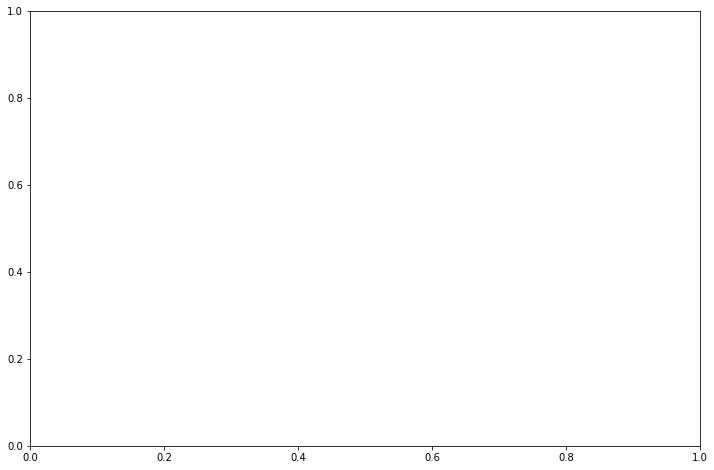

In [6]:
k = KMeans(K=4, iter=150, plot_steps=True)
y_p = k.predict(X)
#k.plot()